In [20]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Loaded the dataset into a pandas dataframe
data = pd.read_csv("Spotify_Data.csv" , encoding="latin1")
# Dimensions of the dataset before cleaning
print(data.shape)

(4600, 29)


In [3]:
data.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

In [4]:
data.drop_duplicates(inplace=True)
# Dimensions of the dataset after cleaning
print(data.shape)

(4598, 29)


In [5]:
data.describe()

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4598.000000,3794.000000,4037.000000,3677.000000,3543.000000,0.0,4598.000000
mean,41.850892,63.498682,54.613574,32.321730,25.346034,NaN,0.359069
std,38.550706,16.189952,71.628469,54.287051,25.993157,NaN,0.479780
min,19.400000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.000000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.000000,15.000000,17.000000,NaN,0.000000
75%,44.475000,73.000000,70.000000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.000000,632.000000,210.000000,NaN,1.000000


In [6]:
data.drop("TIDAL Popularity",axis=1,inplace=True)
data.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'Explicit Track'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4598 non-null   object 
 1   Album Name                  4598 non-null   object 
 2   Artist                      4593 non-null   object 
 3   Release Date                4598 non-null   object 
 4   ISRC                        4598 non-null   object 
 5   All Time Rank               4598 non-null   object 
 6   Track Score                 4598 non-null   float64
 7   Spotify Streams             4485 non-null   object 
 8   Spotify Playlist Count      4528 non-null   object 
 9   Spotify Playlist Reach      4526 non-null   object 
 10  Spotify Popularity          3794 non-null   float64
 11  YouTube Views               4290 non-null   object 
 12  YouTube Likes               4283 non-null   object 
 13  TikTok Posts                3425 non-n

In [8]:
cleaned_data = data.drop(["Soundcloud Streams","SiriusXM Spins"],axis=1)
cleaned_data.describe()
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4598 non-null   object 
 1   Album Name                  4598 non-null   object 
 2   Artist                      4593 non-null   object 
 3   Release Date                4598 non-null   object 
 4   ISRC                        4598 non-null   object 
 5   All Time Rank               4598 non-null   object 
 6   Track Score                 4598 non-null   float64
 7   Spotify Streams             4485 non-null   object 
 8   Spotify Playlist Count      4528 non-null   object 
 9   Spotify Playlist Reach      4526 non-null   object 
 10  Spotify Popularity          3794 non-null   float64
 11  YouTube Views               4290 non-null   object 
 12  YouTube Likes               4283 non-null   object 
 13  TikTok Posts                3425 non-n

In [9]:
print(cleaned_data.isnull().sum())

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Shazam Counts                  577
Explicit Track                   0
dtype: int64


In [10]:
# Drop all columns with more than 1000 null values
cleaned_data = cleaned_data.loc[:, cleaned_data.isna().sum() <= 1000]
cleaned_data.isnull().sum()
cleaned_data.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Likes',
       'TikTok Views', 'Apple Music Playlist Count', 'AirPlay Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach', 'Shazam Counts',
       'Explicit Track'],
      dtype='object')

## Remaining Columns
Based on the remaining columns that have less than 1000 null values we will remove all the columns that do not fit our needs of looking at streams/views (i.e YouTube Likes, TikTok Likes)


In [11]:

cleaned_data.drop({"Spotify Playlist Count","Spotify Playlist Reach", "Spotify Popularity" , "YouTube Likes" , "TikTok Likes", "Deezer Playlist Count", "Deezer Playlist Reach"},axis=1,inplace=True)
cleaned_data.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams', 'YouTube Views',
       'TikTok Views', 'Apple Music Playlist Count', 'AirPlay Spins',
       'Shazam Counts', 'Explicit Track'],
      dtype='object')

In [12]:
platform_cols = ['Spotify Streams', 'YouTube Views', 'TikTok Views', 'Apple Music Playlist Count','AirPlay Spins', 'Shazam Counts']
cleaned_data['Spotify Streams'] = (
    cleaned_data['Spotify Streams']
    .astype(str)
    .str.replace(',', '', regex=False)
    .replace('', pd.NA)
)

cleaned_data['Spotify Streams'] = pd.to_numeric(cleaned_data['Spotify Streams'], errors='coerce')
pca_data = cleaned_data[platform_cols].copy()
print(pca_data.shape)
print(pca_data.describe())
print(pca_data.isnull().sum())

(4598, 6)
       Spotify Streams  Apple Music Playlist Count
count     4.485000e+03                 4037.000000
mean      4.474069e+08                   54.613574
std       5.385504e+08                   71.628469
min       1.071000e+03                    1.000000
25%       7.035455e+07                   10.000000
50%       2.398507e+08                   28.000000
75%       6.291025e+08                   70.000000
max       4.281469e+09                  859.000000
Spotify Streams               113
YouTube Views                 308
TikTok Views                  981
Apple Music Playlist Count    561
AirPlay Spins                 498
Shazam Counts                 577
dtype: int64


In [13]:
# Step 2: Convert everything to numeric (in case there are strings)

for col in pca_data.columns:
    pca_data[col] = (
        pca_data[col].astype(str).str.replace(',', '', regex=False)
    )
    pca_data[col] = pd.to_numeric(pca_data[col], errors='coerce')
    
print(pca_data.shape)
print(pca_data.describe())





(4598, 6)
       Spotify Streams  YouTube Views  TikTok Views  \
count     4.485000e+03   4.290000e+03  3.617000e+03   
mean      4.474069e+08   4.027841e+08  1.161724e+09   
std       5.385504e+08   7.020105e+08  5.883161e+09   
min       1.071000e+03   9.130000e+02  1.900000e+01   
25%       7.035455e+07   4.075612e+07  5.898017e+07   
50%       2.398507e+08   1.482696e+08  2.660640e+08   
75%       6.291025e+08   4.646921e+08  9.145973e+08   
max       4.281469e+09   1.632276e+10  2.332323e+11   

       Apple Music Playlist Count  AirPlay Spins  Shazam Counts  
count                 4037.000000   4.100000e+03   4.021000e+03  
mean                    54.613574   5.513323e+04   2.529828e+06  
std                     71.628469   1.279414e+05   6.040202e+06  
min                      1.000000   1.000000e+00   1.000000e+00  
25%                     10.000000   4.785000e+02   2.301330e+05  
50%                     28.000000   5.953500e+03   8.545840e+05  
75%                     70.00000

In [14]:
# Drop rows with missing or zero Spotify Streams
pca_data = pca_data[(pca_data['Spotify Streams'].notna()) & (pca_data['Spotify Streams'] > 0)]


print(pca_data.shape)
print(pca_data.describe())


(4485, 6)
       Spotify Streams  YouTube Views  TikTok Views  \
count     4.485000e+03   4.216000e+03  3.595000e+03   
mean      4.474069e+08   3.956194e+08  1.146190e+09   
std       5.385504e+08   6.940763e+08  5.862247e+09   
min       1.071000e+03   9.130000e+02  1.900000e+01   
25%       7.035455e+07   4.030729e+07  5.902786e+07   
50%       2.398507e+08   1.453262e+08  2.660640e+08   
75%       6.291025e+08   4.589935e+08  9.084496e+08   
max       4.281469e+09   1.632276e+10  2.332323e+11   

       Apple Music Playlist Count  AirPlay Spins  Shazam Counts  
count                 4026.000000   4.054000e+03   3.972000e+03  
mean                    54.697466   5.544200e+04   2.412485e+06  
std                     71.677247   1.282998e+05   4.001079e+06  
min                      1.000000   1.000000e+00   1.000000e+00  
25%                     10.000000   5.285000e+02   2.342135e+05  
50%                     28.000000   6.145500e+03   8.583320e+05  
75%                     70.00000

In [15]:
# Step 4: Drop rows with NaNs in the other columns
pca_data = pca_data.dropna()

print(pca_data.shape)
print(pca_data.describe())



(3087, 6)
       Spotify Streams  YouTube Views  TikTok Views  \
count     3.087000e+03   3.087000e+03  3.087000e+03   
mean      5.281854e+08   4.205240e+08  1.138028e+09   
std       5.285498e+08   7.007960e+08  6.167509e+09   
min       2.971850e+05   1.151200e+04  1.900000e+01   
25%       1.464156e+08   6.033357e+07  6.300714e+07   
50%       3.566859e+08   1.790536e+08  2.716600e+08   
75%       7.285305e+08   5.090448e+08  9.069364e+08   
max       4.281469e+09   1.632276e+10  2.332323e+11   

       Apple Music Playlist Count  AirPlay Spins  Shazam Counts  
count                 3087.000000   3.087000e+03   3.087000e+03  
mean                    63.145125   6.302498e+04   2.951620e+06  
std                     76.476702   1.354314e+05   4.256492e+06  
min                      1.000000   1.000000e+00   1.261000e+03  
25%                     14.000000   1.163000e+03   4.655375e+05  
50%                     36.000000   1.015600e+04   1.308034e+06  
75%                     82.00000

In [16]:
# Step 5: Normalize other platforms by Spotify Streams
pca_data_normalized = pca_data.div(pca_data['Spotify Streams'], axis=0)

print(pca_data_normalized.shape)
print(pca_data_normalized.describe())


(3087, 6)
       Spotify Streams  YouTube Views  TikTok Views  \
count           3087.0    3087.000000  3.087000e+03   
mean               1.0       8.732746  2.132537e+01   
std                0.0     408.035726  4.619257e+02   
min                1.0       0.000008  5.834412e-08   
25%                1.0       0.237162  1.990707e-01   
50%                1.0       0.530751  6.715037e-01   
75%                1.0       1.135657  2.465415e+00   
max                1.0   22667.706351  2.032087e+04   

       Apple Music Playlist Count  AirPlay Spins  Shazam Counts  
count                3.087000e+03   3.087000e+03    3087.000000  
mean                 1.756991e-07   1.819470e-04       0.006959  
std                  3.677627e-07   5.474396e-04       0.014008  
min                  1.237608e-09   2.174272e-09       0.000001  
25%                  6.167918e-08   5.331795e-06       0.002216  
50%                  1.067595e-07   3.117801e-05       0.004039  
75%                  1.806950e-0

In [17]:
# Step 6: Drop 'Spotify Streams' column (it's all 1.0 now)
pca_data_normalized = pca_data_normalized.drop(columns=['Spotify Streams'])

print(pca_data_normalized.shape)
print(pca_data_normalized.describe())



(3087, 5)
       YouTube Views  TikTok Views  Apple Music Playlist Count  AirPlay Spins  \
count    3087.000000  3.087000e+03                3.087000e+03   3.087000e+03   
mean        8.732746  2.132537e+01                1.756991e-07   1.819470e-04   
std       408.035726  4.619257e+02                3.677627e-07   5.474396e-04   
min         0.000008  5.834412e-08                1.237608e-09   2.174272e-09   
25%         0.237162  1.990707e-01                6.167918e-08   5.331795e-06   
50%         0.530751  6.715037e-01                1.067595e-07   3.117801e-05   
75%         1.135657  2.465415e+00                1.806950e-07   1.250596e-04   
max     22667.706351  2.032087e+04                8.065786e-06   1.223778e-02   

       Shazam Counts  
count    3087.000000  
mean        0.006959  
std         0.014008  
min         0.000001  
25%         0.002216  
50%         0.004039  
75%         0.007463  
max         0.384040  


In [18]:
# ✅ Final check
print("Shape after cleaning:", pca_data_normalized.shape)
print(pca_data_normalized.describe())

Shape after cleaning: (3087, 5)
       YouTube Views  TikTok Views  Apple Music Playlist Count  AirPlay Spins  \
count    3087.000000  3.087000e+03                3.087000e+03   3.087000e+03   
mean        8.732746  2.132537e+01                1.756991e-07   1.819470e-04   
std       408.035726  4.619257e+02                3.677627e-07   5.474396e-04   
min         0.000008  5.834412e-08                1.237608e-09   2.174272e-09   
25%         0.237162  1.990707e-01                6.167918e-08   5.331795e-06   
50%         0.530751  6.715037e-01                1.067595e-07   3.117801e-05   
75%         1.135657  2.465415e+00                1.806950e-07   1.250596e-04   
max     22667.706351  2.032087e+04                8.065786e-06   1.223778e-02   

       Shazam Counts  
count    3087.000000  
mean        0.006959  
std         0.014008  
min         0.000001  
25%         0.002216  
50%         0.004039  
75%         0.007463  
max         0.384040  


In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_data_normalized)

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Put into DataFrame
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
print(pca_df.head())

        PC1       PC2
0  0.515272 -0.054067
1  0.471925 -0.198493
2  0.235520  0.039504
3  0.432535 -0.357953
4  0.528471 -0.366729


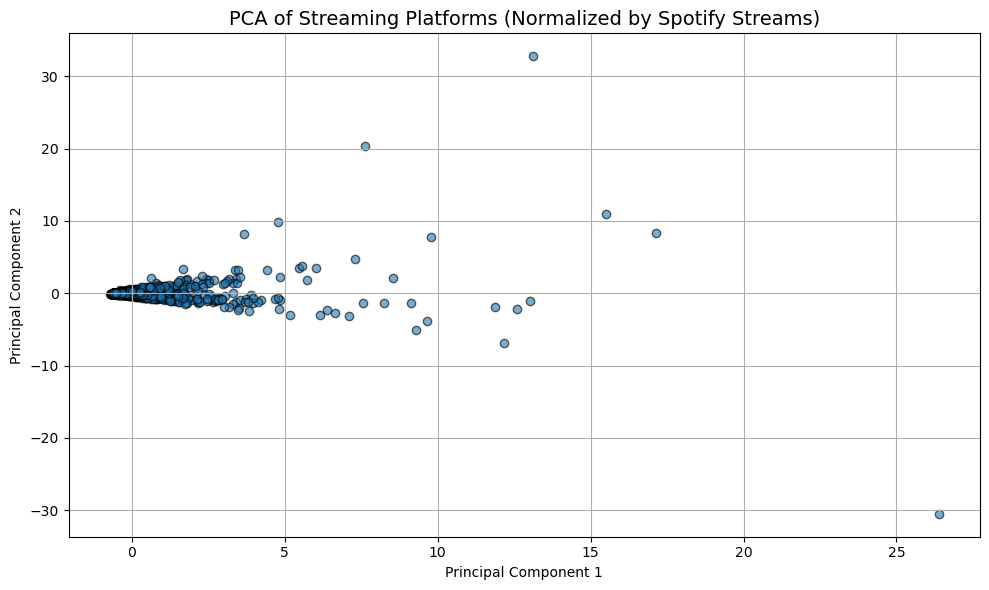

In [21]:
# Scatter plot of PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6, edgecolors='k')

plt.title("PCA of Streaming Platforms (Normalized by Spotify Streams)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

                                 PC1       PC2
YouTube Views               0.326852 -0.501605
TikTok Views                0.210445  0.681617
Apple Music Playlist Count  0.604178 -0.094537
AirPlay Spins               0.460649 -0.309924
Shazam Counts               0.521203  0.422849


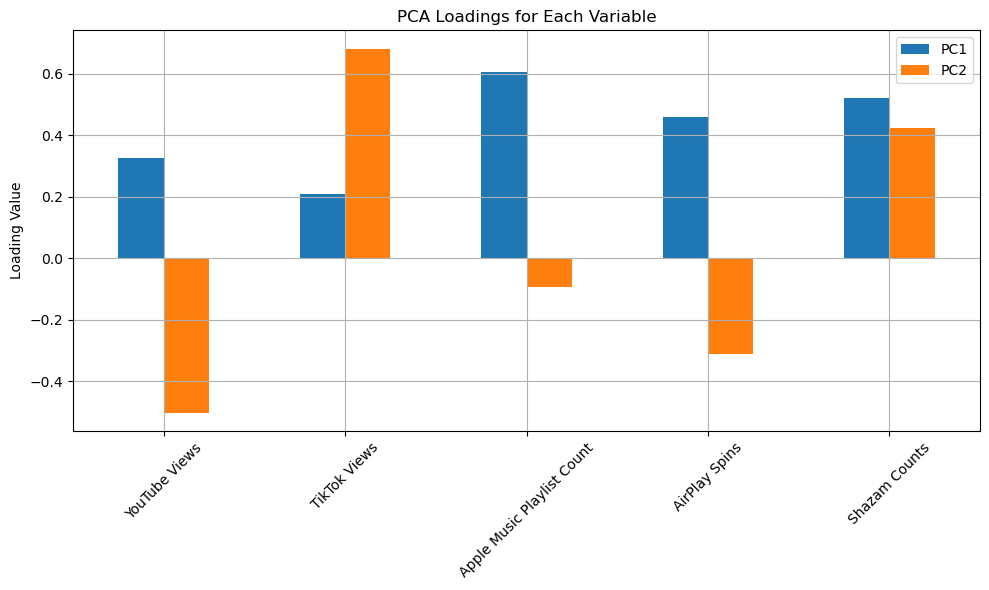

In [22]:
# Get the PCA components (loadings)
loadings = pd.DataFrame(
    pca.components_,            # shape (n_components, n_features)
    columns=pca_data_normalized.columns,
    index=['PC1', 'PC2']        # name the rows after components
)

print(loadings.T)  # Transpose to view variables as rows

loadings.T.plot(kind='bar', figsize=(10, 6))
plt.title("PCA Loadings for Each Variable")
plt.ylabel("Loading Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
# Explained variance ratio
explained_var = pca.explained_variance_ratio_
print(f"PC1 explains {explained_var[0]:.2%} of variance")
print(f"PC2 explains {explained_var[1]:.2%} of variance")


PC1 explains 29.17% of variance
PC2 explains 21.85% of variance


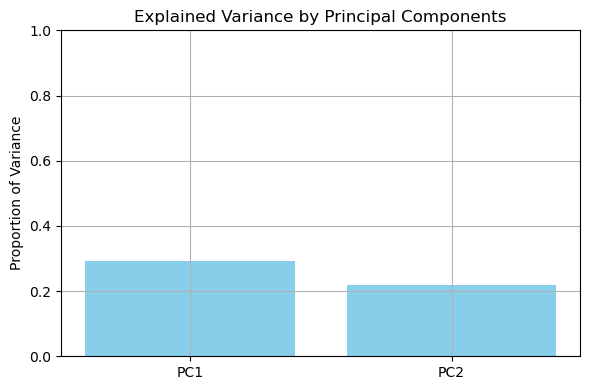

In [24]:
plt.figure(figsize=(6, 4))
plt.bar(['PC1', 'PC2'], explained_var[:2], color='skyblue')
plt.title('Explained Variance by Principal Components')
plt.ylabel('Proportion of Variance')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Add PCA scores to original data
pca_scored = pca_df.copy()
pca_scored['Track'] = pca_data.index  # or replace with actual track names if you have them

# Top 5 by PC1
top_pc1 = pca_scored.sort_values('PC1', ascending=False).head(5)
print("Top 5 songs on PC1:\n", top_pc1)

# Top 5 by PC2
top_pc2 = pca_scored.sort_values('PC2', ascending=False).head(5)
print("Top 5 songs on PC2:\n", top_pc2)


Top 5 songs on PC1:
            PC1        PC2  Track
10   26.377107 -30.497797     14
935  17.138858   8.327594   1292
574  15.506936  10.956575    773
754  13.121050  32.788435   1024
334  13.023121  -1.021255    461
Top 5 songs on PC2:
             PC1        PC2  Track
754   13.121050  32.788435   1024
1362   7.637640  20.358113   1922
574   15.506936  10.956575    773
75     4.765392   9.804574    113
935   17.138858   8.327594   1292


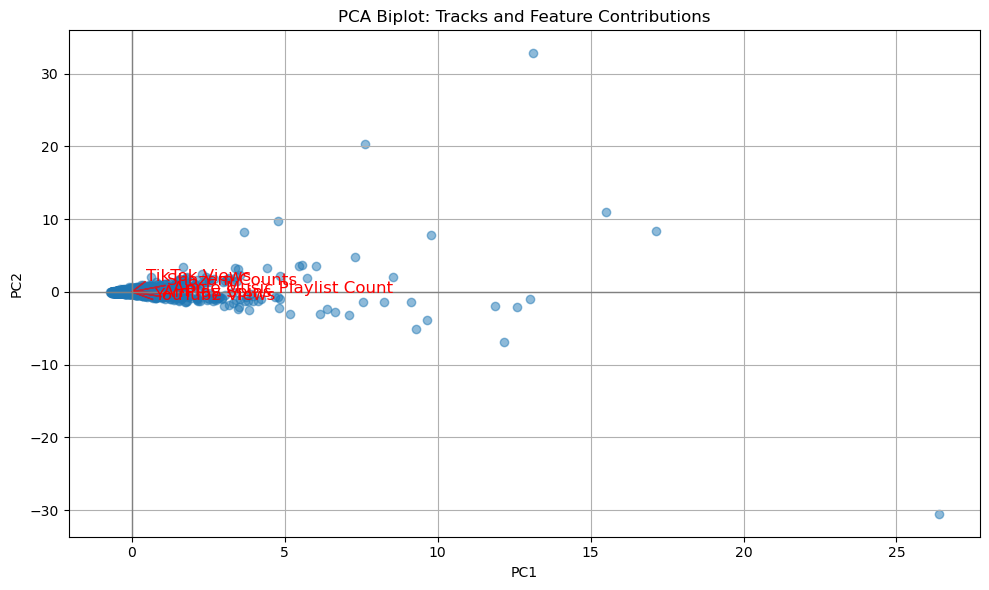

In [26]:
plt.figure(figsize=(10, 6))

# Plot songs (dots)
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5, label='Songs')

# Plot arrows for variable contributions
for i, feature in enumerate(pca_data_normalized.columns):
    plt.arrow(0, 0,           # Start at origin
              loadings.iloc[0, i]*2,  # PC1 direction scaled
              loadings.iloc[1, i]*2,  # PC2 direction scaled
              color='r', alpha=0.7, head_width=0.05)
    plt.text(loadings.iloc[0, i]*2.2, loadings.iloc[1, i]*2.2,
             feature, color='r', fontsize=12)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot: Tracks and Feature Contributions")
plt.grid(True)
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.tight_layout()
plt.show()